In [1]:
#Import the necessary libraries (numpy and pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#read the scraped file
df = pd.read_csv('tweetfinalhealthscotland.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,52,53,54,55,56,145,162,163,164,165,166,168,169,171,172,173,174,175,176,183,184,185,186,187,188,190,196,197,198,199,200,201,202,207,210,212,213,214,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 217 entries, Unnamed: 0 to user.label.longDescription
dtypes: bool(2), float64(64), int64(14), object(137)
memory usage: 32.8+ MB


In [4]:
# drop the columns that are not required
df = df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                 'user.label._type', 'user.label.description', 'user.label.url',
                 'user.label.badgeUrl','user.label.longDescription', 'quotedTweet.source',
                 'quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [5]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             20000 non-null  int64 
 1   date                   20000 non-null  object
 2   content                20000 non-null  object
 3   replyCount             20000 non-null  int64 
 4   retweetCount           20000 non-null  int64 
 5   likeCount              20000 non-null  int64 
 6   lang                   20000 non-null  object
 7   sourceLabel            20000 non-null  object
 8   hashtags               3891 non-null   object
 9   username               20000 non-null  object
 10  user_dispaly_name      20000 non-null  object
 11  user_description       18072 non-null  object
 12  user_raw_description   18072 non-null  object
 13  user_verified          20000 non-null  bool  
 14  user_created           20000 non-null  object
 15  user_followers_coun

In [7]:
# drop the rows
#df.drop(df.index[10000:20000],0,inplace=True)

In [8]:
#df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             10000 non-null  int64 
 1   date                   10000 non-null  object
 2   content                10000 non-null  object
 3   replyCount             10000 non-null  int64 
 4   retweetCount           10000 non-null  int64 
 5   likeCount              10000 non-null  int64 
 6   lang                   10000 non-null  object
 7   sourceLabel            10000 non-null  object
 8   hashtags               1910 non-null   object
 9   username               10000 non-null  object
 10  user_dispaly_name      10000 non-null  object
 11  user_description       8764 non-null   object
 12  user_raw_description   8764 non-null   object
 13  user_verified          10000 non-null  bool  
 14  user_created           10000 non-null  object
 15  user_followers_count

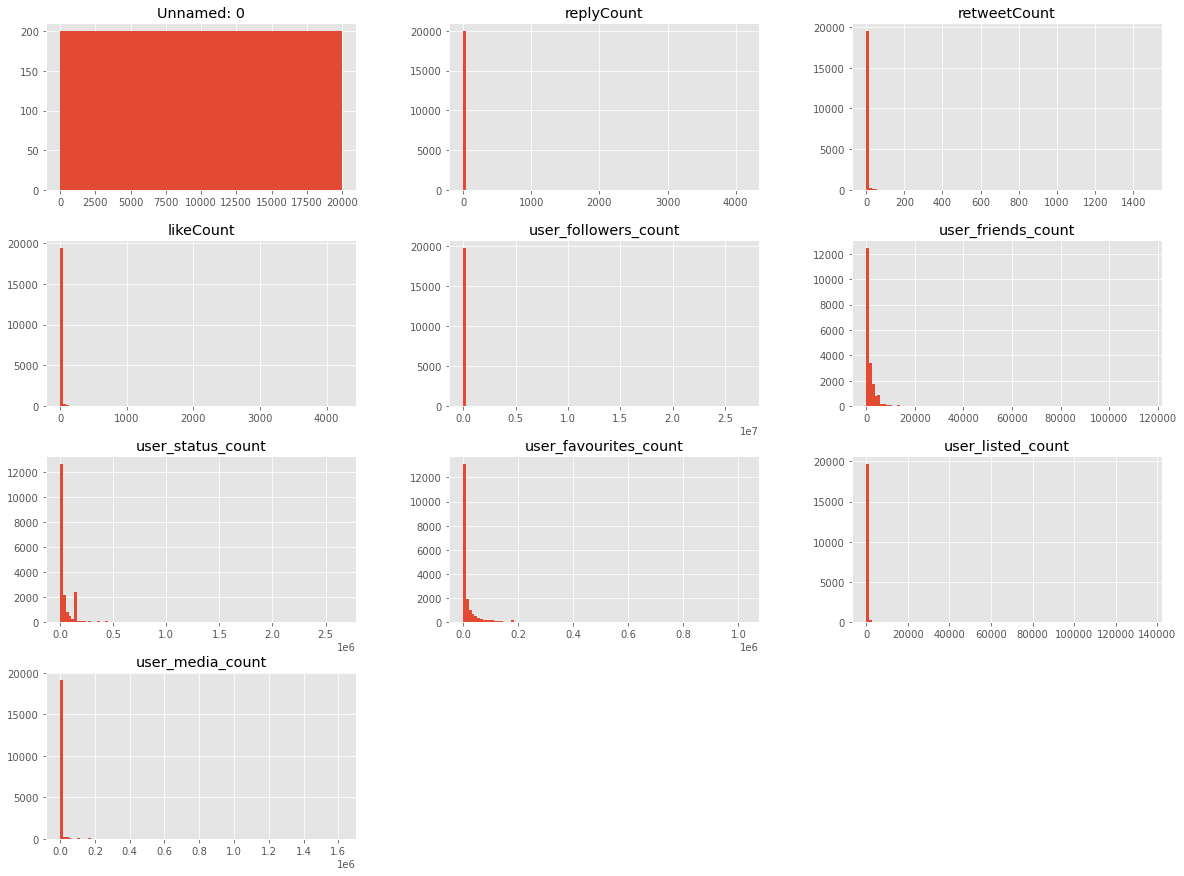

In [7]:
#visualising for better undertanding of the spread of the variables
df.hist(bins=100, figsize=(20,15))
plt.show()

In [8]:
# IMPORT modules for natural language processing

In [9]:
import re
import string
import nltk

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [11]:
#creating a stopwords set
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

<AxesSubplot:>

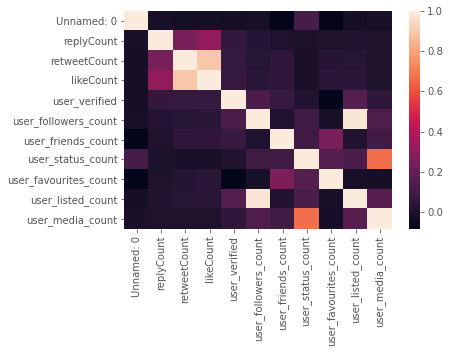

In [13]:
import seaborn as sns
sns.heatmap(df.corr())

Percentage False    0.92355
True     0.07645
Name: user_verified, dtype: float64


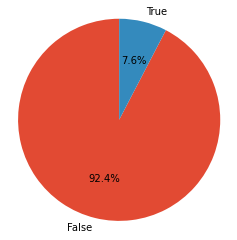

In [15]:
print('Percentage',df.user_verified.value_counts(normalize=True))

f, ax = plt.subplots(figsize=(4, 4))
plt.pie(df['user_verified'].value_counts().tolist(), 
        labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [16]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [17]:
# make a new dataframe with only content
content_df = df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_df.head()

,content
0,"@KevinStewartSNP says ""We must do better."" Que..."
1,@MentalWelfare That's right. You can say what ...
2,@jackiebmsp @MareeToddMSP @HumzaYousaf A prior...
3,@small4lyfe @keviemac @bhrenton @CDCMMWR Do yo...
4,@GEEKTech2010 @ezrocks0011 I download a free e...


In [18]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [19]:
content_df = content_df.rename(columns={'content':'tokenized_content'})

In [20]:
content_df.head()

,tokenized_content
0,"@KevinStewartSNP says ""We must do better."" Que..."
1,@MentalWelfare That's right. You can say what ...
2,@jackiebmsp @MareeToddMSP @HumzaYousaf A prior...
3,@small4lyfe @keviemac @bhrenton @CDCMMWR Do yo...
4,@GEEKTech2010 @ezrocks0011 I download a free e...


In [21]:
def preprocess_content_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [22]:
content_df.tokenized_content = content_df['tokenized_content'].apply(preprocess_content_text)

In [23]:
content_df.tokenized_content.head()
                

0    kevinstewartsnp says must better question goin...
1    mentalwelfare thats right say want dont want w...
2    jackiebmsp mareetoddmsp humzayousaf priority c...
3    small4lyfe keviemac bhrenton cdcmmwr wish send...
4    geektech2010 ezrocks0011 download free exempti...
Name: tokenized_content, dtype: object

In [24]:
#content_df = content_df.drop_duplicates('content')

In [25]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [26]:
content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: stemming(x))

In [27]:
# check the data after pre-processing
content_df['tokenized_content'][0]

'kevinstewartsnp says must better question going anyone going scotgov mentalwelfare scothumanrights mhlrscot lockedinthehospital'

In [28]:
# import VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [30]:
def sentiment_vader(content):
    over_all_polarity = sia.polarity_scores(content)
    if over_all_polarity['compound'] >= 0.06:
        return "positive"
    elif over_all_polarity['compound'] <= -0.06:
        return "negative"
    else:
        return "neutral"

In [31]:
content_df['sentiment_vader'] = content_df['tokenized_content'].apply(lambda x: sentiment_vader(x))

In [32]:
#diplay the dataframe with the new column for sentiment
content_df

,tokenized_content,sentiment_vader
0,kevinstewartsnp says must better question goin...,positive
1,mentalwelfare thats right say want dont want w...,positive
2,jackiebmsp mareetoddmsp humzayousaf priority c...,positive
3,small4lyfe keviemac bhrenton cdcmmwr wish send...,positive
4,geektech2010 ezrocks0011 download free exempti...,positive
...,...,...
19995,latest data public health scotland phs shows 1...,neutral
19996,philips pacs interoperability helps scotland ’...,negative
19997,philips pacs interoperability helps scotland ’...,negative
19998,scotnational public health experts agree andre...,negative


Percentage positive    0.54825
negative    0.27035
neutral     0.18140
Name: sentiment_vader, dtype: float64


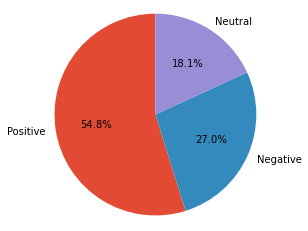

In [33]:
print('Percentage',content_df['sentiment_vader'].value_counts(normalize=True))
#content_df.sentiment_vader._counts(normalize=True).plot(kind='pie')
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(content_df['sentiment_vader'].value_counts().tolist(), 
        labels=['Positive', 'Negative', 'Neutral'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [34]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("maree|humza|kevinstewart|scotgov|holyrood|NHSGGC|secretary|SNP|NHSScotland|Sturgeon", content)
    
    return terms

In [35]:
content_df['terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [36]:
content_df

,tokenized_content,sentiment_vader,terms_mentioned
0,kevinstewartsnp says must better question goin...,positive,"[kevinstewart, scotgov]"
1,mentalwelfare thats right say want dont want w...,positive,[]
2,jackiebmsp mareetoddmsp humzayousaf priority c...,positive,"[maree, humza]"
3,small4lyfe keviemac bhrenton cdcmmwr wish send...,positive,[]
4,geektech2010 ezrocks0011 download free exempti...,positive,[]
...,...,...,...
19995,latest data public health scotland phs shows 1...,neutral,[]
19996,philips pacs interoperability helps scotland ’...,negative,[]
19997,philips pacs interoperability helps scotland ’...,negative,[]
19998,scotnational public health experts agree andre...,negative,[]


In [37]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("WP|Westminster|Boris|Sunak|Liz|UK|union|tories", content)
    
    return terms

In [38]:
content_df['centre_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [46]:
#extracting the positive for state

def perception(content):
    if(content['sentiment_vader'] == 'positive' and len(content['terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'negative' and len(content['terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'positive' and len(content['centre_terms_mentioned'])==0):
        return 'incorrect'
    elif(content['sentiment_vader'] == 'negative' and len(content['centre_terms_mentioned'])==0):
        return 'incorrect'
    
    return 'Non-opinionated'

In [47]:
content_df['perception'] = content_df.apply(perception, axis=1)

In [48]:
content_df

,tokenized_content,sentiment_vader,terms_mentioned,centre_terms_mentioned,perception
0,kevinstewartsnp says must better question goin...,positive,"[kevinstewart, scotgov]",[],correct
1,mentalwelfare thats right say want dont want w...,positive,[],[],incorrect
2,jackiebmsp mareetoddmsp humzayousaf priority c...,positive,"[maree, humza]",[],correct
3,small4lyfe keviemac bhrenton cdcmmwr wish send...,positive,[],[],incorrect
4,geektech2010 ezrocks0011 download free exempti...,positive,[],[],incorrect
...,...,...,...,...,...
19995,latest data public health scotland phs shows 1...,neutral,[],[],Non-opinionated
19996,philips pacs interoperability helps scotland ’...,negative,[],[],incorrect
19997,philips pacs interoperability helps scotland ’...,negative,[],[],incorrect
19998,scotnational public health experts agree andre...,negative,[],[],incorrect


In [49]:
content_df['perception'][:5]

0      correct
1    incorrect
2      correct
3    incorrect
4    incorrect
Name: perception, dtype: object

In [50]:
df.head()

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,lang,sourceLabel,hashtags,username,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,0,2022-08-23 02:39:35+00:00,"@KevinStewartSNP says ""We must do better."" Que...",0,0,0,en,Twitter Web App,['LockedInTheHospital'],RightsScotland,...,"Association of service users & carers, 'surviv...",False,2019-02-10T19:12:20+00:00,334,74,3083,3802,2,35,"Scotland, United Kingdom"
1,1,2022-08-23 02:27:00+00:00,@MentalWelfare That's right. You can say what ...,0,0,0,en,Twitter Web App,NaN,RightsScotland,...,"Association of service users & carers, 'surviv...",False,2019-02-10T19:12:20+00:00,334,74,3083,3802,2,35,"Scotland, United Kingdom"
2,2,2022-08-23 02:00:24+00:00,@jackiebmsp @MareeToddMSP @HumzaYousaf A prior...,0,0,0,en,Twitter for iPhone,NaN,jthomson_john,...,#Indy. The only thing that makes sense for Sco...,False,2012-06-16T20:46:02+00:00,2940,4634,53392,49072,8,2842,Amrightbehindyouffs
3,3,2022-08-23 00:54:22+00:00,@small4lyfe @keviemac @bhrenton @CDCMMWR Do yo...,1,0,0,en,Twitter for iPad,NaN,Road_Closed1984,...,“Those that fail to learn from history are doo...,False,2022-05-07T12:20:58+00:00,1675,4950,1766,3079,1,300,"Broken Hill NSW, Australia"
4,4,2022-08-23 00:32:09+00:00,@GEEKTech2010 @ezrocks0011 I download a free e...,0,2,4,en,Twitter Web App,NaN,SirTarquin1,...,Account 29/12/2021 - 12/29/2021\nEnglish\nBrex...,False,2021-12-29T21:59:52+00:00,4174,4150,37265,27401,8,7426,England


In [51]:
content_perception_df = pd.concat([content_df, df], axis=1)

In [52]:
content_perception_df.head()

,tokenized_content,sentiment_vader,terms_mentioned,centre_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,kevinstewartsnp says must better question goin...,positive,"[kevinstewart, scotgov]",[],correct,0,2022-08-23 02:39:35+00:00,"@KevinStewartSNP says ""We must do better."" Que...",0,0,...,"Association of service users & carers, 'surviv...",False,2019-02-10T19:12:20+00:00,334,74,3083,3802,2,35,"Scotland, United Kingdom"
1,mentalwelfare thats right say want dont want w...,positive,[],[],incorrect,1,2022-08-23 02:27:00+00:00,@MentalWelfare That's right. You can say what ...,0,0,...,"Association of service users & carers, 'surviv...",False,2019-02-10T19:12:20+00:00,334,74,3083,3802,2,35,"Scotland, United Kingdom"
2,jackiebmsp mareetoddmsp humzayousaf priority c...,positive,"[maree, humza]",[],correct,2,2022-08-23 02:00:24+00:00,@jackiebmsp @MareeToddMSP @HumzaYousaf A prior...,0,0,...,#Indy. The only thing that makes sense for Sco...,False,2012-06-16T20:46:02+00:00,2940,4634,53392,49072,8,2842,Amrightbehindyouffs
3,small4lyfe keviemac bhrenton cdcmmwr wish send...,positive,[],[],incorrect,3,2022-08-23 00:54:22+00:00,@small4lyfe @keviemac @bhrenton @CDCMMWR Do yo...,1,0,...,“Those that fail to learn from history are doo...,False,2022-05-07T12:20:58+00:00,1675,4950,1766,3079,1,300,"Broken Hill NSW, Australia"
4,geektech2010 ezrocks0011 download free exempti...,positive,[],[],incorrect,4,2022-08-23 00:32:09+00:00,@GEEKTech2010 @ezrocks0011 I download a free e...,0,2,...,Account 29/12/2021 - 12/29/2021\nEnglish\nBrex...,False,2021-12-29T21:59:52+00:00,4174,4150,37265,27401,8,7426,England


Percentage incorrect          0.71430
Non-opinionated    0.21155
correct            0.07415
Name: perception, dtype: float64


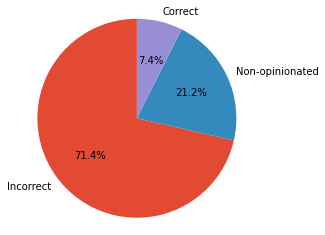

In [54]:
print('Percentage',content_perception_df.perception.value_counts(normalize=True))
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(content_perception_df['perception'].value_counts().tolist(), 
        labels=['Incorrect', 'Non-opinionated', 'Correct'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

In [ ]:
#def perception(voter):
    #if voter == "1":
        #return "correct"
    #elif voter == "":
        #return "non-partisan"
    #elif voter == "0":
        #return "incorrect"

In [ ]:
#content_perception_df['voter'] = content_perception_df['voter_perception'].apply(perception)

In [ ]:
#content_perception_df

In [ ]:
#fig = plt.figure(figsize=(5,5))
#sns.countplot(x='voter', data = content_perception_df)

#### fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = content_perception_df['voter'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp,
         explode = explode, label="")
plt.title("attribution of responsibility by voters")

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [56]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_perception_df['tokenized_content'])

In [57]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 261145

First 20 features:
 ['00', '00 zebre', '000', '000 en', '000 naissances', '000 original', '0002', '0002 sewage', '0007', '0007 none', '000s', '000s people', '003', '003 1747', '00309362', '00309362 sort', '008', '008 6587', '01', '01 april']


In [58]:
x = content_perception_df['tokenized_content']
y = content_perception_df['perception']
x = vect.transform(x)

In [59]:
x.shape

(20000, 261145)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [61]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (16000, 261145)
Size of y_train: (16000,)
Size of x_test: (4000, 261145)
Size of y_test: (4000,)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [63]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.35%


/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 555   24  281]
 [  26  235   35]
 [  60    0 2784]]


                 precision    recall  f1-score   support

Non-opinionated       0.87      0.65      0.74       860
        correct       0.91      0.79      0.85       296
      incorrect       0.90      0.98      0.94      2844

       accuracy                           0.89      4000
      macro avg       0.89      0.81      0.84      4000
   weighted avg       0.89      0.89      0.89      4000



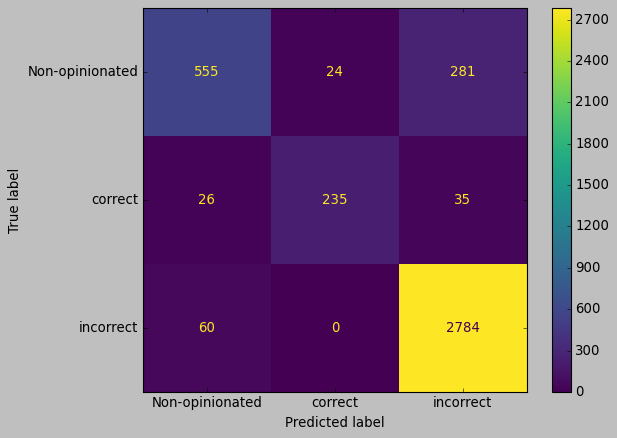

In [66]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [69]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [70]:
y_pred= grid.predict(x_test)

In [71]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.38%


In [72]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 555   24  281]
 [  26  235   35]
 [  60    0 2784]]


                 precision    recall  f1-score   support

Non-opinionated       0.87      0.65      0.74       860
        correct       0.91      0.79      0.85       296
      incorrect       0.90      0.98      0.94      2844

       accuracy                           0.89      4000
      macro avg       0.89      0.81      0.84      4000
   weighted avg       0.89      0.89      0.89      4000



In [73]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [74]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:2f}%".format(svc_acc*100))

test accuracy: 89.150000%


In [75]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 599   28  233]
 [  21  251   24]
 [ 128    0 2716]]


                 precision    recall  f1-score   support

Non-opinionated       0.80      0.70      0.75       860
        correct       0.90      0.85      0.87       296
      incorrect       0.91      0.95      0.93      2844

       accuracy                           0.89      4000
      macro avg       0.87      0.83      0.85      4000
   weighted avg       0.89      0.89      0.89      4000



In [76]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [1,3,5,7],
    'gamma': [0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [77]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.1}


In [78]:
y_pred = grid.predict(x_test)

In [79]:
logreg_acc= accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.40%


In [80]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 562   29  269]
 [  19  249   28]
 [  79    0 2765]]


                 precision    recall  f1-score   support

Non-opinionated       0.85      0.65      0.74       860
        correct       0.90      0.84      0.87       296
      incorrect       0.90      0.97      0.94      2844

       accuracy                           0.89      4000
      macro avg       0.88      0.82      0.85      4000
   weighted avg       0.89      0.89      0.89      4000



In [76]:
test_df = pd.read_csv('tweetfinalhealthkerala.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,54,162,163,164,165,166,168,169,171,172,173,174,175,176,183,184,185,186,187,188,190,196,197,198,199,200,201,202,207,210,212,213,214,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
test_df.info()

In [ ]:
# drop the columns that are not required
test_df = test_df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                 'user.label._type', 'user.label.description', 'user.label.url',
                 'user.label.badgeUrl','user.label.longDescription', 'quotedTweet.source',
                 'quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [ ]:
# drop additional columns that appear towards the right of the last relevant column
test_df.drop(test_df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [ ]:
test_df.info()

In [ ]:
# drop the rows
test_df.drop(test_df.index[:19800],0,inplace=True)

In [ ]:
test_df.info()

In [ ]:
#visualising for better undertanding of the spread of the variables
test_df.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
test_df.columns

In [ ]:
content_test_df = test_df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_test_df.head()

In [ ]:
def preprocess_content_test_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [ ]:
content_test_df.content = content_test_df['content'].apply(preprocess_content_test_text)

In [ ]:
content_test_df.content.head()

In [ ]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [ ]:
content_test_df['content'] = content_test_df['content'].apply(lambda x: stemming(x))

In [ ]:
content_test_df

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_test_df['content'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

In [ ]:
x = content_test_df['content']
x = vect.transform(x)

In [ ]:
x.shape

In [ ]:
content_test_df.shape

In [ ]:
prediction = SVCmodel.predict(x)